In [1]:
#topic of research project: finding objects at distances around that of the sun in M31

#we have to see the distance distribution of stars at a comparable distance from the centre of their galaxy to that of the sun 
#
from ReadFile import Read
import numpy as np #importing numpy library
import astropy.units as u #importing astropy's unit library to get our answers with their units
import matplotlib.pyplot as plt
#from CenterOfMass2 import CenterOfMass
from CenterOfMass_Solution import CenterOfMass
#CORRECT FOR COM OF MILKY WAY 
#MAKE SURE TO HAVE COM AFTER X,Y,Z POSITION
#no need to have a for loop for an ARRAY
#np.where index 

#rotate disk in x,y plane 


MW COM xyz position: [-2.07  2.95 -1.45] kpc and xyz velocity: [ 0.94  6.32 -1.35] km / s
M31 COM xyz position: [-377.66  611.43 -284.64] kpc and xyz velocity: [ 0.94  6.32 -1.35] km / s
M33 COM xyz position: [-476.22  491.44 -412.4 ] kpc and xyz velocity: [ 44.42 101.78 142.23] km / s
Separation between the MW and M31 = 769.0 kpc
Relative Velocity between the MW and M31 = 118.0 km / s
Relative Position between M33 and M31 =  201.0 kpc
Relative Velocity between M33 and M31 =  199.0 km / s


In [12]:
def magd(a,b,c):
    d= np.sqrt(a**2+b**2+c**2) 
    return d
#below is a general function to show sun-like stars within a possible area
#note, we have to consider the trajectory at different snapshots or time period, so this dataset is inadequate
def sunlike_stars(filename,particle_type):
    file=Read(filename) #using Read to get all the values from Readfile.py
    #data=file[2]
    t,N,data = Read("MW_000.txt")
    #using variables t for time, N for number of particles and data to get specifics 
    #about them from our text file
    index= np.where(data['type'] == particle_type)
    
    
   
    M31_COM = CenterOfMass("MW_000.txt", 2)
    M31_COM_p = M31_COM.COM_P(0.1).value
    print( M31_COM_p)
    x=data['x'][index] #taking distance in x direction
    
    y=data['y'][index] # #taking distance in y direction
   
    z=data['z'][index]  #taking distance in z direction
    print(z)
    z.size
    total_distance=np.sqrt(x**2+y**2+z**2) 
    M31_COM_p = np.repeat(M31_COM_p, 25000, axis=0)
    #M31_COM_p_reshaped = np.tile(M31_COM_p, (total_distance.shape[0]))
    distance_from_COM = total_distance - M31_COM_p
    sun_distance=8.29 # target distance of the sun in kpc   
    #difference_distance= np.abs(total_distance-sun_distance) #finding out a comparable star at the distance of the sun
    
    difference_distance= np.abs(distance_from_COM-sun_distance)
    #sun=distances.index(min(difference_distance))
    #sun=np.min(difference_distance)
      
    
        
    sunlike=np.where(difference_distance<= 0.1)[0]  #finding possible sunlike stars 
            
    return sunlike 

In [13]:

calling=sunlike_stars("MW_000.txt",2)
t, N, data = Read("MW_000.txt")
difference_distance = np.abs(magd(data['x'][calling], data['y'][calling], data['z'][calling]) - 8.29)


[-2.07  2.95 -1.45]
[-1.3441   -1.28954  -0.245755 ... -2.1069   -1.63853  -1.46021 ]


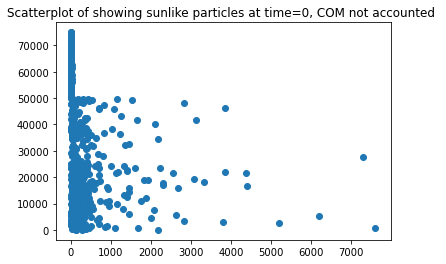

822


In [14]:
# Create a scatterplot of the sunlike candidates
plt.scatter( difference_distance,calling)

# Add title and axis labels
plt.title('Scatterplot of showing sunlike particles at time=0, COM accounted, MW tilt not accounted ')


# Show the plot
plt.show()
print(difference_distance.size)

In [16]:
# we might have to do an n body simulation to show the trend of the distance of the sunlike stars over a period of time
#before that, we have to consider the galactic plane 
x = galactic_coords.cartesian.x.value
y = galactic_coords.cartesian.y.value
z = galactic_coords.cartesian.z.value

# Combine x, y, z into array
xyz = np.column_stack((x, y, z))

NameError: name 'galactic_coords' is not defined